# Most Inlier Image

In [20]:
# imports
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from ulmo import plotting

from ulmo.utils import models as model_utils

# Load model

In [2]:
pae = model_utils.load('standard')

Loading autoencoder model from: /data/Projects/Oceanography/AI/OOD/Models/R2019_2010_128x128_std/autoencoder.pt
Loading flow model from: /data/Projects/Oceanography/AI/OOD/Models/R2019_2010_128x128_std/flow.pt


# Fake samples

In [4]:
pae.flow.flow._distribution._shape

torch.Size([512])

In [26]:
noise = pae.flow.flow._distribution._sample(1,None)

In [9]:
type(tmp), tmp.shape

(torch.Tensor, torch.Size([1, 512]))

## Set all values to the mean

In [27]:
noise[0,:] = 0.

In [28]:
noise

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# To Latent

In [31]:
latents, log_prob = pae.flow.flow._transform.inverse(noise, None)

In [13]:
latents

tensor([[-0.4762,  0.2620,  1.2128, -0.5796, -0.9240,  0.3020,  0.5700,  1.4902,
          0.0414, -0.3075,  0.4341, -0.8210,  0.3700, -1.0104, -0.3294, -0.9168,
         -0.2007, -0.0657, -0.4433, -0.4117,  0.3498, -0.2705, -1.1263,  0.4311,
          0.3005, -0.2024, -1.0429, -0.3377, -0.4474,  0.3755, -0.4190, -0.1715,
         -0.3091,  0.1765, -0.3146,  0.2740, -0.1674, -0.6185, -0.1207,  0.7466,
         -0.1038, -0.2744, -0.0359, -0.0247,  0.5219,  0.2340,  0.1079, -0.5058,
         -0.1741, -0.5089,  0.0779,  0.2068,  0.4128,  0.3581,  0.3994, -0.3510,
         -0.0232,  0.6556,  0.4450,  0.5016,  0.0565, -0.6686,  0.3758,  0.1936,
          1.3479, -0.3457,  0.4948,  0.2625, -0.0089, -1.3106, -0.2249,  0.0306,
          0.3804, -0.2378, -0.5632,  0.3135, -0.5748, -0.0341, -0.0715, -0.5538,
          0.3072,  0.4314,  0.6246, -0.4152,  0.6538, -0.2307, -0.3013, -0.6999,
          0.1651,  0.4307,  0.1880,  0.5412, -0.0627,  0.7120,  0.4488, -0.3883,
          0.3554, -0.0186,  

# To image

In [14]:
rx = pae.autoencoder.decode(latents)

In [15]:
rx.shape

torch.Size([1, 1, 64, 64])

In [18]:
img = pae.to_type(rx, type(np.zeros((1,1,64,64))))

In [19]:
img.shape

(1, 1, 64, 64)

# View

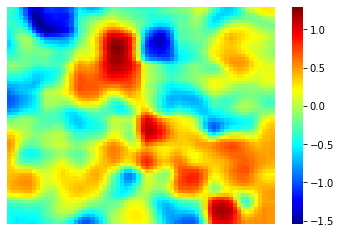

In [25]:
vmnx = (None,None)
# Plot
#fig = plt.figure(figsize=(10, 4))
pal, cm = plotting.load_palette()
plt.clf()

# Original
ax = plt.gca()
sns.heatmap(img[0,0,...], ax=ax, xticklabels=[], yticklabels=[], cmap=cm,
            vmin=vmnx[0], vmax=vmnx[1])
plt.show()